## Khai báo thư viện

In [1]:
import numpy as np # Các hàm tính toán
import pandas as pd # Xử lý dữ liệu: CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Trực quan hóa dữ liệu
import seaborn as sns # Trực quan hóa mô hình thống kê
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Nhập dữ liệu

Dataset sử dụng: adult.csv

In [2]:
df = pd.read_csv('adult.csv', header=None, sep=',\s')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory data analysis (EDA) - Phân tích dữ liệu khám phá

Đổi tên các cột

Chúng ta có thể thấy rằng tập dữ liệu không có tên cột thích hợp. Các cột chỉ được gắn nhãn là: 0,1,2 .... 

=> Đặt lại tên cột

In [3]:
# Đặt tên cột
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Xem tóm tắt của tập dữ liệu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Các loại biến

**1. Các biến định tính**

Tìm các biến định tính

In [5]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('Có {} biến định tính\n'.format(len(categorical)))

print('Các biến định tính là :\n\n', categorical)

Có 9 biến định tính

Các biến định tính là :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Xem các biến định tính

In [6]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


#### Tóm tắt các biến định tính

- Có 9 biến định tính.


- Các biến định tính gồm: `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` and `income`.


- `income` là **biến mục tiêu.**

Kiểm tra các giá trị còn thiếu trong các biến định tính

In [7]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

Bây giờ, chúng ta có thể thấy rằng có một số biến như `workclass`,` Occupation` và `native_country` chứa các giá trị bị thiếu. Nói chung, các giá trị bị thiếu được mã hóa là `NaN` và python sẽ phát hiện chúng bằng lệnh thông thường là`df.isnull().sum () `.

Tuy nhiên, trong trường hợp này, các giá trị bị thiếu được mã hóa là `?` . Python không phát hiện được đây là các giá trị bị thiếu vì nó không coi dấu `?` là các giá trị bị thiếu. Vì vậy, phải thay thế `?` Bằng `NaN` để Python có thể phát hiện các giá trị bị thiếu này.

Xem tần suất các giá trị trong biến định tính

In [8]:
for var in categorical: 
    print(df[var].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

Xem phân phối tần suất của biến định tính

In [9]:
for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64


**Biến `workclass`**

In [10]:
# Check labels
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [11]:
# phân phối tần số của các giá trị trong biến
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Có 1836 giá trị `?` trong `workclass`

In [12]:
# Thay thế '?' thành giá trị 'NaN'
df['workclass'].replace('?', np.NaN, inplace=True)
# kiểm tra lại sự phân bố tần suất của các giá trị trong biến
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

**Biến `occupation`**

In [13]:
# check labels 
df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [14]:
# kiểm tra sự phân bố tần suất của các giá trị trong biến
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Có 1843 giá trị `?` trong `occupation`

In [15]:
# Thay thế '?' thành giá trị 'NaN'
df['occupation'].replace('?', np.NaN, inplace=True)
# kiểm tra lại sự phân bố tần suất của các giá trị trong biến
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

**Biến `native_country`**

In [16]:
# check labels
df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [17]:
# Kiểm tra sự phân bố tần suất các giá trị trong biến
df.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

Có 583 giá trị `?` trong `native_country`

In [18]:
#Thay thế '?' thành giá trị 'NaN'
df['native_country'].replace('?', np.NaN, inplace=True)
# Kiểm tra lại sự phân bố tần số
df.native_country.value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

Kiểm tra lại các giá trị còn thiếu trong các biến định tính

In [19]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Bây giờ, chúng ta có thể thấy rằng biến `workclass`,` Occupation` và `native_country` chứa các giá trị bị thiếu.

### Số lượng label: cardinality


Số lượng label trong một biến định tính được gọi là **cardinality**. Số lượng label cao vượt trội trong một biến được gọi là **high cardinality**. Cardinality có thể gây ra một số vấn đề nghiêm trọng trong mô hình học máy. Vì vậy, phải kiểm tra cardinality.

In [20]:
# check cardinality trong biến định tính

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


Chúng ta có thể thấy rằng cột `native_country` chứa số lượng nhãn tương đối lớn so với các cột khác.

### 2. Các biến định lượng

In [21]:
# Xác định các biến định lượng:

numerical = [var for var in df.columns if df[var].dtype!='O']

print('Có {} biến định lượng\n'.format(len(numerical)))

print('Các biến định lượng là :', numerical)

Có 6 biến định lượng

Các biến định lượng là : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [22]:
# Xem các biến định lượng

df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


### Tóm tắt các biến định lượng


- Có 6 biến định lượng.


- Chúng là `age`,` fnlwgt`, `education_num`,` capital_gain`, `capital_loss` và` hours_per_week`.


- Tất cả các biến định lượng đều là biến rời rạc.

In [23]:
# Kiểm tra giá trị bị thiếu

df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

6 biến định lượng đều không chứa giá trị bị thiếu

## Khai báo vectơ đặc trưng và biến mục tiêu

In [24]:
X = df.drop(['income'], axis=1)

y = df['income']

## Chia dữ liệu thành từng tập riêng biệt: huấn luyện (training set) và thử nghiệm (test set)

In [25]:
# chia X và y thành các tập huấn luyện và thử nghiệm

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
# kiểm tra kích thước của X_train và X_test

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

## Feature Engineering 

`Feature Engineering` là quá trình chuyển đổi dữ liệu thô thành các `feature` hữu ích giúp hiểu rõ hơn về mô hình của mình và tăng khả năng dự đoán của mô hình.

In [27]:
# Kiểm tra kiểu dữ liệu X_train

X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [28]:
#Hiển thị biến định lượng

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [29]:
# Hiển thị biến định tính

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical


['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

Thêm giá trị (yếu vị) vào các giá trị bị thiếu

In [30]:
# hiển thị các biến định lượng chứa giá trị bị thiếu và số lượng giá trị bị thiếu
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().sum()))

workclass 1276
occupation 1278
native_country 414


In [31]:
# Thay thế giá trị bị thiếu bằng yếu vị (mode)

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)
    
# kiểm tra lại các giá trị bị thiếu của biến định tính trong X_train

X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [32]:
# kiểm tra lại các giá trị bị thiếu của biến định tính trong X_test
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [33]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


Chúng ta có thể thấy rằng không có giá trị nào bị thiếu trong X_train và X_test. 

### Mã hóa các biến định lượng

In [34]:
# import category encoders

import category_encoders as ce
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [35]:
print(X_train.shape)
X_train.head()

(22792, 105)


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [36]:
print(X_test.shape)
X_test.head()

(9769, 105)


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


Từ 14 cột ban đầu, chúng ta đã có 105 cột

 ## Chuẩn hóa dữ liệu - Feature Scaling

In [37]:
cols = X_train.columns
cols

Index(['age', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'fnlwgt',
       ...
       'native_country_32', 'native_country_33', 'native_country_34',
       'native_country_35', 'native_country_36', 'native_country_37',
       'native_country_38', 'native_country_39', 'native_country_40',
       'native_country_41'],
      dtype='object', length=105)

In [38]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [39]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_test = pd.DataFrame(X_test, columns=[cols])
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.656361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.253496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.042564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Bây giờ chúng ta đã có tập dữ liệu `X_train` sau khi xử lý đã sẵn sàng được đưa vào bộ phân loại `Gaussian Naive Bayes`.

## Model Training

In [41]:
# Chạy Gaussian Naive Bayes classifier trên tập huấn luyện (training set)
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

## Dự đoán kết quả

In [42]:
y_pred = gnb.predict(X_test)

y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

## Kiểm tra độ chính xác

In [43]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8083


Ở đây, **y_test** là các nhãn lớp thực tế và **y_pred** là các nhãn lớp được dự đoán trong tập thử nghiệm.

### So sánh độ chính xác của bộ huấn luyện (train-set) và bộ thử nghiệm (test-set)


Bây giờ, chúng ta sẽ so sánh độ chính xác của bộ huấn luyện và bộ thử nghiệm để kiểm tra xem có bị Overfitting (- hiện tượng mô hình quá khớp với dữ liệu) hay không?

In [44]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['>50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [45]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8067


**Kiểm tra Overfitting và Underfitting**

In [46]:
# Hiện scores trên tập huấn luyện và tập thử nghiệm

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8067
Test set score: 0.8083


Độ chính xác trên tập huấn luyện là 0,8067 trong khi độ chính xác của tập thử nghiệm là 0,8083. Hai giá trị này hoàn toàn có thể so sánh được. Vì vậy, không có dấu hiệu Overfitting/underfitting.

### So sánh độ chính xác của mô hình với độ chính xác Null


Độ chính xác của mô hình là 0,8083. Nhưng, chúng ta không thể nói rằng mô hình của chúng ta rất tốt dựa trên độ chính xác ở trên. Chúng ta phải so sánh nó với độ chính xác **`null`**. Độ chính xác Null là độ chính xác có thể đạt được bằng cách luôn dự đoán lớp thường xuyên nhất.

Vì vậy, trước tiên chúng ta nên kiểm tra sự phân bố lớp trong tập thử nghiệm.

In [47]:
# kiểm tra sự phân bố của lớp trong tập thử nghiệm

y_test.value_counts()

<=50K    7407
>50K     2362
Name: income, dtype: int64

Chúng ta có thể thấy rằng số lần xuất hiện của lớp thường xuyên nhất là `7407`. Vì vậy, chúng ta có thể tính độ chính xác null bằng cách `chia 7407 cho tổng số lần xuất hiện.`

In [48]:
# Kiểm tra null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


Ta có thể thấy rằng độ chính xác của mô hình là 0,8083 còn độ chính xác Null là 0,7582. Vì vậy, chúng ta có thể kết luận rằng mô hình Phân loại Gaussian Naive Bayes của chúng ta đang làm tốt trong việc dự đoán các nhãn lớp.

Tuy nhiên, nó không cung cấp phân phối cơ bản của các giá trị. Ngoài ra, nó không cho biết bất cứ điều gì về loại lỗi mà bộ phân loại của chúng ta đang thực hiện.


Có một công cụ khác được gọi là ***`Ma trận nhầm lẫn - Confusion matrix`***  để giải quyết vấn đề này.

## Confusion matrix

`Ma trận nhầm lẫn` là một công cụ để tóm tắt hiệu suất của một thuật toán phân loại. Một ma trận nhầm lẫn sẽ cho chúng ta một bức tranh rõ ràng về hiệu suất của mô hình phân loại và các loại lỗi do mô hình tạo ra. Nó cung cấp cho chúng ta một bản tóm tắt các dự đoán đúng và sai được chia nhỏ theo từng danh mục. Bản tóm tắt được trình bày dưới dạng bảng.

Có bốn loại kết quả trong khi đánh giá hoạt động của mô hình phân loại:
Hay còn được gọi là Contingency Table và chỉ được sử dụng đối với bài toán phân loại.

- **True Positives (TPi)** : Số lượng các ví dụ thuộc lớp ci được phân loại chính xác vào lớp ci

- **False Positives (FPi)**: Số lượng các ví dụ không thuộc lớp ci bị phân loại nhầm vào lớp ci

- **True Negatives (TNi)**: Số lượng các ví dụ không thuộc lớp ci được phân loại (chính xác)

- **False Negatives (FNi)**: Số lượng các ví dụ thuộc lớp ci bị phân loại nhầm (vào các lớp khác ci)
 ![title](Phanloai.png)

In [49]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5999 1408]
 [ 465 1897]]

True Positives(TP) =  5999

True Negatives(TN) =  1897

False Positives(FP) =  1408

False Negatives(FN) =  465


Ma trận nhầm lẫn hiển thị `5999 + 1897 = 7896 dự đoán đúng` và` 1408 + 465 = 1873 dự đoán sai`.


Trong trường hợp này, ta có:


- `True Positives` (TP: 1 và Dự đoán Tích cực: 1) - 5999


- `True Negatives` (TN: 0 và Phủ định Dự đoán: 0) - 1897


- `False Positives` (FP: 0 nhưng Dự đoán Dương tính: 1) - 1408` (Lỗi loại I) `


- `False Negatives` (FN: 1 nhưng Dự đoán Phủ định: 0) - 465 `(Lỗi loại II)`

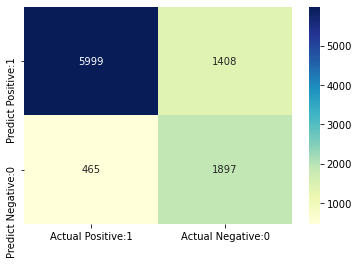

In [50]:
# Trực quan bằng seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Số liệu phân loại

### Báo cáo Phân loại


**Báo cáo phân loại** là một cách khác để đánh giá hiệu suất của mô hình phân loại. Nó hiển thị điểm **precision**, **recall**, **f1-score** và **support** cho mô hình.

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769



**Classification accuracy**

In [52]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [53]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8083


In [54]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1917


In [55]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8099


In [56]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9281


In [57]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9281


In [58]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4260


In [59]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5740


## Tính xác suất của lớp

In [60]:
# in ra 10 xác suất dự đoán đầu tiên của hai lớp- 0 và 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99999426e-01, 5.74152436e-07],
       [9.99687907e-01, 3.12093456e-04],
       [1.54405602e-01, 8.45594398e-01],
       [1.73624321e-04, 9.99826376e-01],
       [8.20121011e-09, 9.99999992e-01],
       [8.76844580e-01, 1.23155420e-01],
       [9.99999927e-01, 7.32876705e-08],
       [9.99993460e-01, 6.53998797e-06],
       [9.87738143e-01, 1.22618575e-02],
       [9.99999996e-01, 4.01886317e-09]])

### Quan sát (observations)


- Trong mỗi hàng, tổng các số bằng 1.


- Có 2 cột tương ứng với 2 lớp - `<= 50K` và `> 50K`.

     - Lớp 0 => <= 50K - Lớp mà một người làm được ít hơn 50K.
    
     - Class 1 =>> 50K - Class mà một người kiếm được hơn 50K.
        
    
- Tầm quan trọng của các xác suất dự đoán

     - Chúng ta có thể xếp hạng các quan sát theo xác suất xem một người kiếm được ít hơn hoặc bằng 50K hay nhiều hơn 50K.


- Quy trình dự đoán_proba

     - Dự đoán các xác suất
    
     - Chọn lớp có xác suất cao nhất
    
    
- Mức ngưỡng phân loại

     - Có ngưỡng phân loại mức 0,5.
    
     - Hạng 0 => <= 50K - dự đoán xác suất lương nhỏ hơn hoặc bằng 50K nếu xác suất <0,5.
    
     - Hạng 1 =>> 50K - dự đoán xác suất lương hơn 50K nếu xác suất> 0,5.

In [61]:
# lưu trữ các xác suất vào 1 dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999994e-01,5.741524e-07
1,9.996879e-01,3.120935e-04
2,1.544056e-01,8.455944e-01
3,1.736243e-04,9.998264e-01
4,8.201210e-09,1.000000e+00
5,8.768446e-01,1.231554e-01
6,9.999999e-01,7.328767e-08
7,9.999935e-01,6.539988e-06
8,9.877381e-01,1.226186e-02
9,1.000000e+00,4.018863e-09


In [62]:
# in ra 10 xác suất dự đoán đầu tiên cho lớp 1 - Xác suất> 50K
gnb.predict_proba(X_test)[0:10, 1]

array([5.74152436e-07, 3.12093456e-04, 8.45594398e-01, 9.99826376e-01,
       9.99999992e-01, 1.23155420e-01, 7.32876705e-08, 6.53998797e-06,
       1.22618575e-02, 4.01886317e-09])

In [63]:
# lưu trữ các xác suất dự đoán cho lớp 1 - Xác suất> 50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Tần suất')

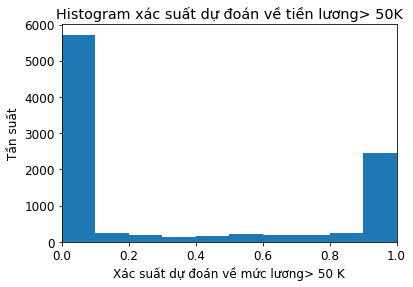

In [64]:
# biểu đồ của các xác suất dự đoán
# chỉnh size
plt.rcParams['font.size'] = 12
# biểu đồ histogram với 10 cột
plt.hist(y_pred1, bins = 10)
# đạt tên biểu đồ
plt.title('Histogram xác suất dự đoán về tiền lương> 50K')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Xác suất dự đoán về mức lương> 50 K')
plt.ylabel('Tần suất')

### Quan sát


- Chúng ta có thể thấy rằng biểu đồ trên có độ lệch rất cao.


- Cột đầu tiên cho chúng ta biết rằng có khoảng 5700 quan sát với xác suất từ 0,0 đến 0,1 có mức lương
   là <= 50K.


- Số lượng quan sát tương đối nhỏ với xác suất> 0,5.


- Vì vậy, số lượng quan sát nhỏ này dự đoán rằng mức lương sẽ> 50K.


- Phần lớn các quan sát cho rằng mức lương sẽ <= 50 nghìn.

### Đường cong ROC


Một công cụ khác để đo lường hiệu suất mô hình phân loại một cách trực quan là **Đường cong ROC**. ROC Curve là viết tắt của **Receiver Operating Characteristic Curve**. **Đường cong ROC** là một biểu đồ thể hiện hiệu suất của một mô hình phân loại ở các mức ngưỡng phân loại.

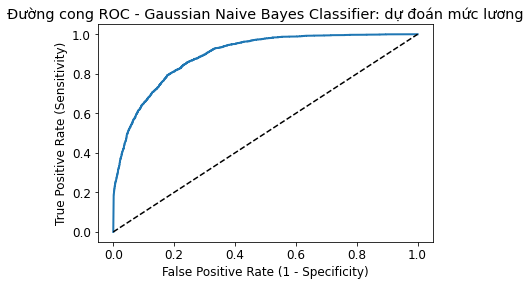

In [65]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('Đường cong ROC - Gaussian Naive Bayes Classifier: dự đoán mức lương')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

Đường cong ROC giúp chúng ta chọn mức ngưỡng cân bằng giữa độ nhạy và độ đặc hiệu cho một mô hình cụ thể.

### ROC AUC

**ROC AUC** là viết tắt của **Receiver Operating Characteristic - Area Under Curve**. Nó là một kỹ thuật để so sánh hiệu suất của trình phân loại. Trong kỹ thuật này, chúng tôi đo `khu vực dưới đường cong (AUC)`. Một bộ phân loại hoàn hảo sẽ có ROC AUC bằng 1, trong khi bộ phân loại hoàn toàn ngẫu nhiên sẽ có ROC AUC bằng 0,5.

Vì vậy, **ROC AUC** là phần trăm của ô ROC nằm bên dưới đường cong. 

In [66]:
# tính ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8941


- ROC AUC là một bản tóm tắt số đơn về hiệu suất của trình phân loại. Giá trị càng cao, bộ phân loại càng tốt.

In [67]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8938


## Kết quả và kết luận

1. Xây dựng một mô hình Gaussian Naïve Bayes Classifier để dự đoán liệu một người có kiếm được hơn 50 nghìn một năm hay không?. Mô hình mang lại hiệu suất tốt được chỉ ra bởi độ chính xác của mô hình là: 0,8083.


2. Điểm chính xác của training-set là 0,8067 trong khi độ chính xác của test-set là 0,8083. Hai giá trị này hoàn toàn có thể so sánh được. Vì vậy, không có dấu hiệu của việc Overfitting


3. Tôi đã so sánh độ chính xác của mô hình là 0,8083 với độ chính xác rỗng là 0,7582. Vì vậy, chúng ta có thể kết luận rằng mô hình phân loại Gaussian Naïve Bayes của chúng ta đang làm tốt trong việc dự đoán các nhãn lớp.


4. ROC AUC của mô hình tiếp cận theo hướng 1. Vì vậy, ta có thể kết luận rằng bộ phân loại này làm rất tốt trong việc dự đoán liệu một người có kiếm được hơn 50 nghìn một năm hay không.